In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

from metric import *

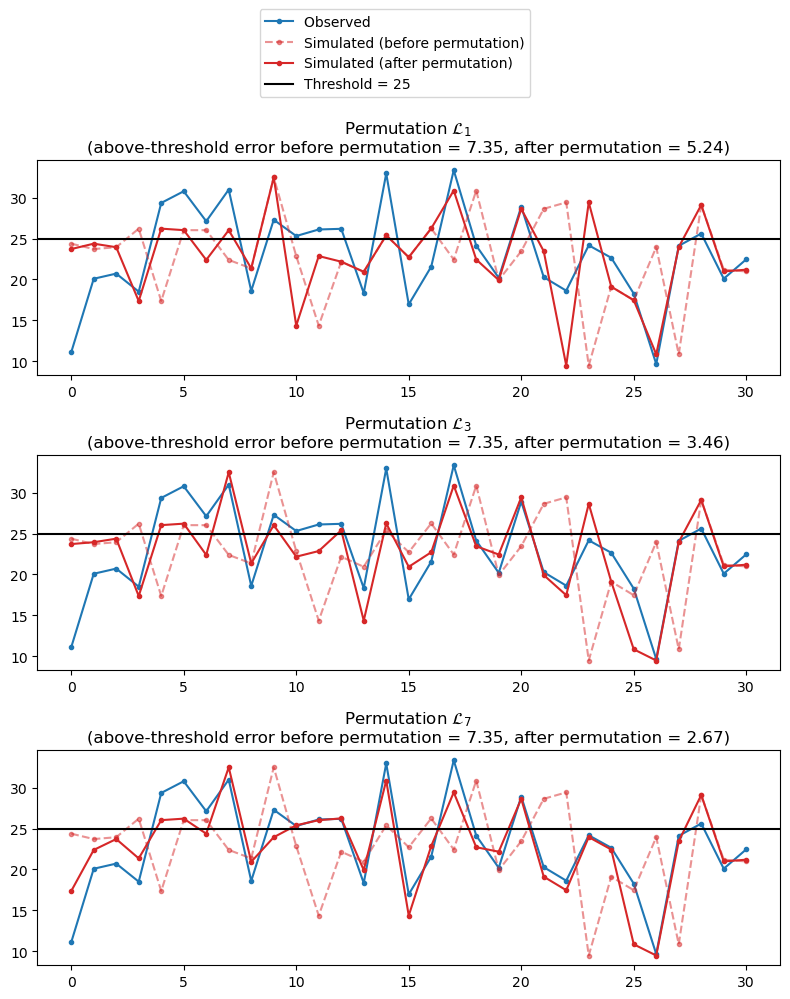

In [2]:
A = np.random.normal(25,6,31)
B = np.random.normal(23,6,31)

windows = [1,3,7]
threshold = 25
threshold_type = 'lower'

fig, axes = plt.subplots(ncols=1, nrows=len(windows), figsize=(8, 3*len(windows)))

for i, window in enumerate(windows):
    ax = axes[i]
    B_matched = reorder(A, B, window=window)
    cost_B = threshold_cost(A, B, threshold=threshold, threshold_type = threshold_type)
    cost_B_matched = threshold_cost(A, B_matched, threshold = threshold, threshold_type = threshold_type)
    
    ax.plot(A, marker = '.', label = 'Observed ', c = 'tab:blue')
    ax.plot(B, ls = '--', marker = '.', label = 'Simulated (before permutation)', c = 'tab:red', alpha = 0.5)
    ax.plot(B_matched, ls = '-', marker = '.', label = 'Simulated (after permutation)', c = 'tab:red')
    ax.axhline(threshold, c = 'k', label = 'Threshold = {}'.format(threshold))
    ax.set_title('Permutation $\mathcal{{L}}_{}$ \n(above-threshold error before permutation = {:.2f}, after permutation = {:.2f})'.format(window, cost_B, cost_B_matched))

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor = (0.5,1))
plt.tight_layout()